**About the Dataset**

This dataset contains basic details of clients regarding the insurance premimum
  - Age : Age of a person
  - Sex : Gender
  - BMI : Body Mass Index
  - Children : Number of Children a person has
  - Smoker: If client smokes or not
  - Region : Which Region does the client Belong to
  - Charges : Insurance premimum charges paid by client

**Importing Important libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading CSV file**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance/insurance.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data Exploration
In this section we vizualise the data using univariate and bi-variate plots and simple descriptive statistics. 

In [ ]:
data.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.437687,30.630189,1.101695,13524.816768
std,14.171492,6.230134,1.224185,12416.940908
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.050000,0.000000,4759.829400
50%,40.000000,30.210000,1.000000,9391.346000
75%,51.000000,34.800000,2.000000,17062.210700
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 769 to 363
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   charges   1003 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.7+ KB


We can see that all the columns are non-null. 
Age, bmi, children and charges are numerical type while, sex, smoker and region are categorical type.

### Uni-variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


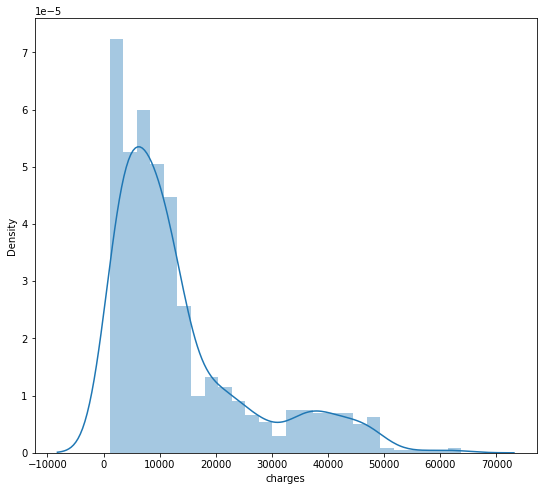

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,8))
sns.distplot(data['charges'])

With this information we can see that the prices are skewed right and some outliers lies above ~50,000. Also, we need to investigate why are we seeing a bimodal distribution here.



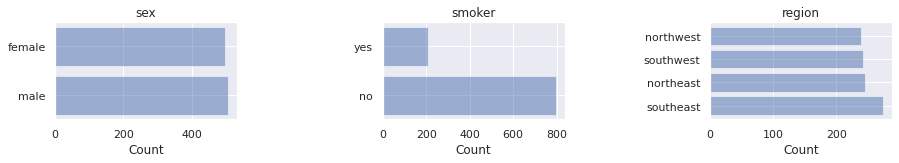

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
attr = ['sex','smoker','region']
for i in range(0,3):
    ax = fig.add_subplot(2, 3, i+1)
    counts = data[attr[i]].value_counts()
    myproblems = list(counts.index)
    my_problem_counts = list(counts)
    y_pos = np.arange(len(myproblems))
    plt.barh(y_pos, my_problem_counts, align='center', alpha=0.5)
    plt.yticks(y_pos, myproblems)
    plt.xlabel('Count')
    plt.title(attr[i])

### Bi-variate Analysis

**Box plot for numerical and categorical Variables**

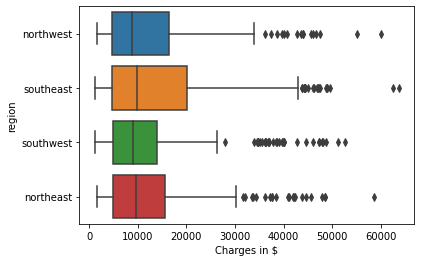

In [ ]:

sns.boxplot(y='region',x=output_var,data=data,orient='h')
plt.xlabel("Charges in $")
plt.show()

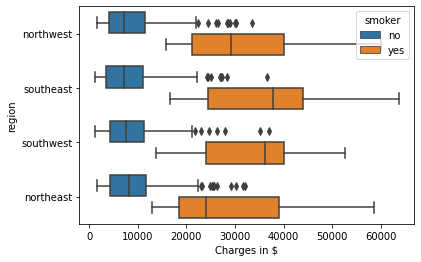

In [ ]:
sns.boxplot(y='region',x='charges',data=data,hue='smoker',orient='h')
plt.xlabel("Charges in $")
plt.show()

###### Note: 
We can see from the box plots above that smoking results in a significant increase in insurance charges. In addition to being higher, it also seems like there is a larger variance in Charges for smokers. Hence outliers only appear in non-smoker where the variance seems much smaller. Also not that smokers are paying a lot more in southeast and southwest compared with the north.

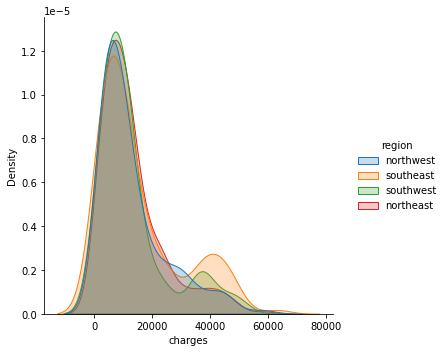

In [ ]:
sns.displot(data, x=output_var, hue="region", kind="kde", fill=True)

###### Note:
All distributions around region are similar, bi-model distributions. We can hypothesise that the two modes are associated with smokers and non-smokers. The increase in charges seems most pronounced for the south east and south west, which can be inferred from the box plots above too.

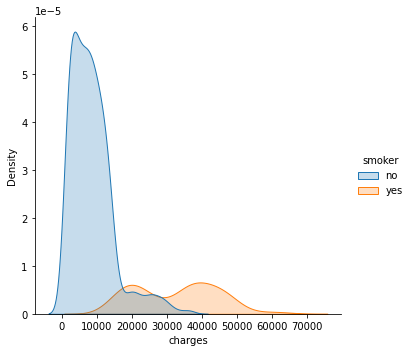

In [ ]:
sns.displot(data, x=output_var, hue="smoker", kind="kde", fill=True)

**T test**

The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not.

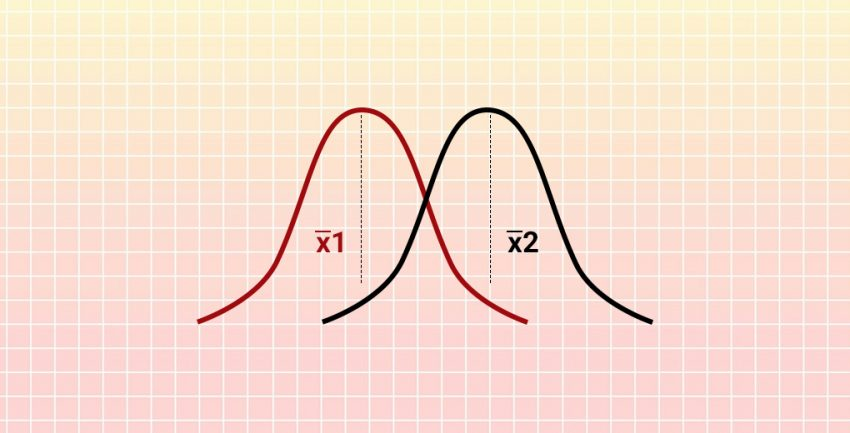

Lets say that we want to compare the distribution of people who smoke with the ones who don't, this is where two-sample t-test is used.
Here is the formula to calculate the t statistic for a two-sample t test:

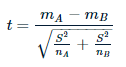


Where,

- mA and mB are the means of two different samples
- nA and nB are the sample sizes
- S2 is an estimator of the common variance of two samples, such as:
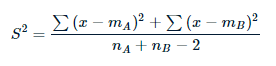

In [ ]:
from scipy.stats import ttest_ind
cat1 = data.query("smoker=='yes'")
cat2 = data.query("smoker=='no'")

ttest_ind(cat1['charges'], cat2['charges'])

Ttest_indResult(statistic=40.467990095450745, pvalue=6.605777632369158e-213)

Since pvalue is less that 0.05, we can say that the two samples, one with smoker==yes and another with smoker==no are not having equal means which indicates that the two samples are not similar.

**Correlation**

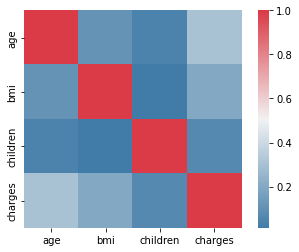

In [ ]:
corr = data.corr()
import seaborn as sns
import numpy as np
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

In [ ]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


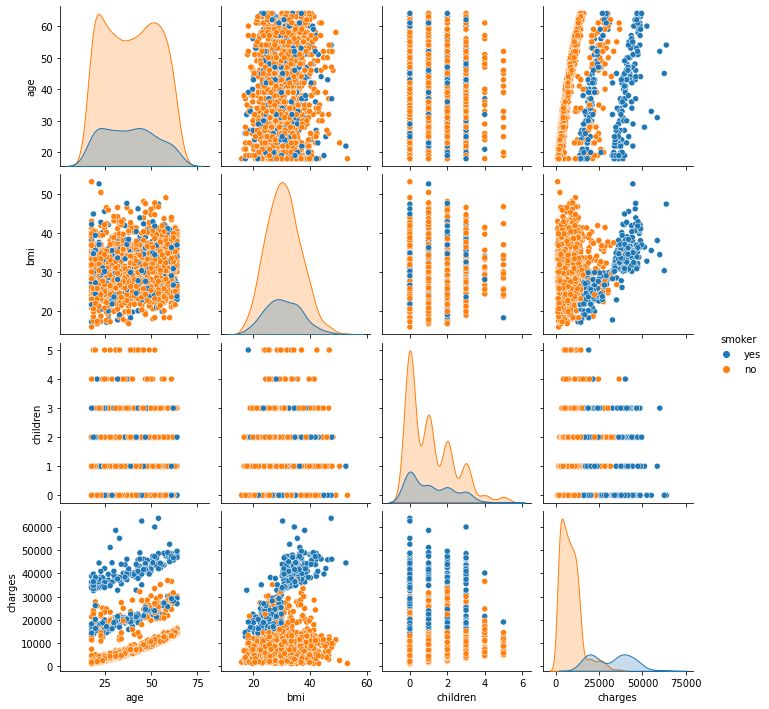

In [ ]:
sns.pairplot(data, hue="smoker", height=2.5)

## Create Dummy Variables

In [ ]:
encoded_data = pd.get_dummies(data, columns=["sex","smoker","region"])
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
